# Fast Fourier Transformation - Test Notebook

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:

SAMPLE_RATE = 44200 # Hertz
DURATION = 5 # Seconds

In [5]:
def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x,y 

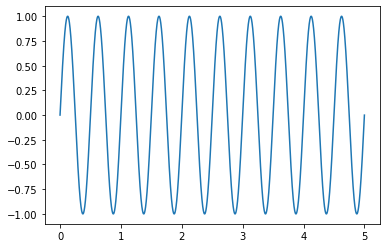

In [6]:
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()

In [7]:

_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone

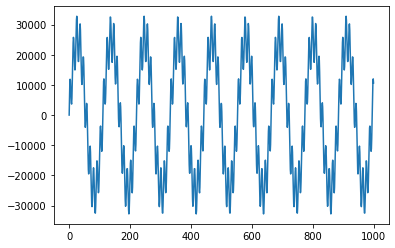

In [8]:
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.plot(normalized_tone[:1000])
plt.show()

In [9]:
from scipy.fft import fft, fftfreq

1. **fft()** calculates the transform itself
2. **fftfreq()** calculates the frequencies in the center of each bin in the output of *fft()*. Without this, there would be no way to plot the x-axis on your frequency spectrum

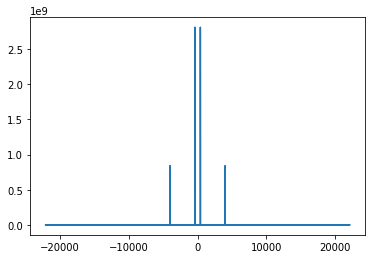

In [10]:
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()